<a href="https://colab.research.google.com/github/saisumedha/FMML-PROJECTS_AND_LABS/blob/main/MODULE04LAB02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

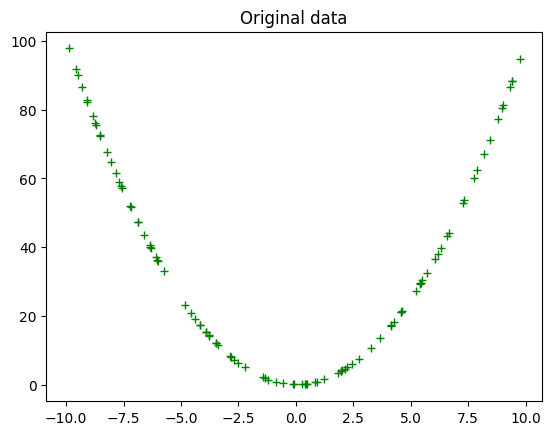

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


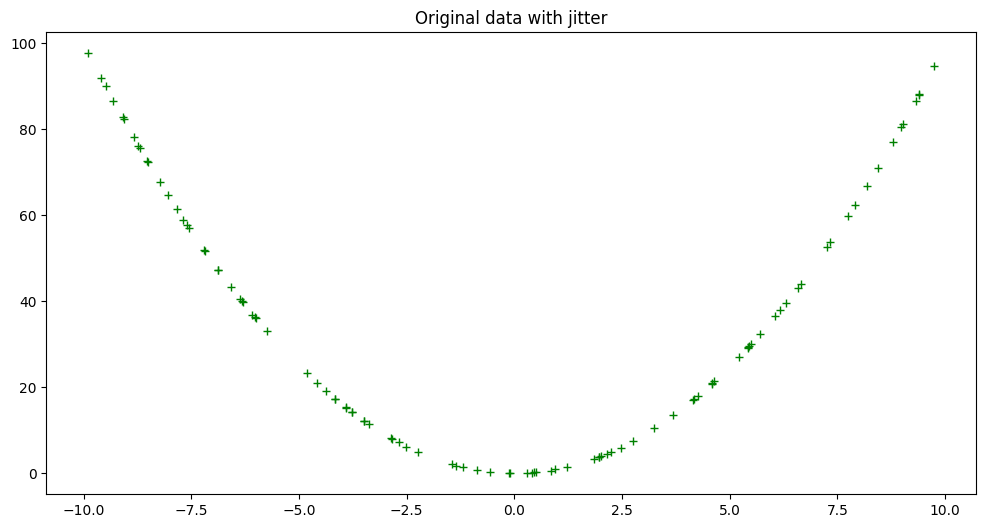

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

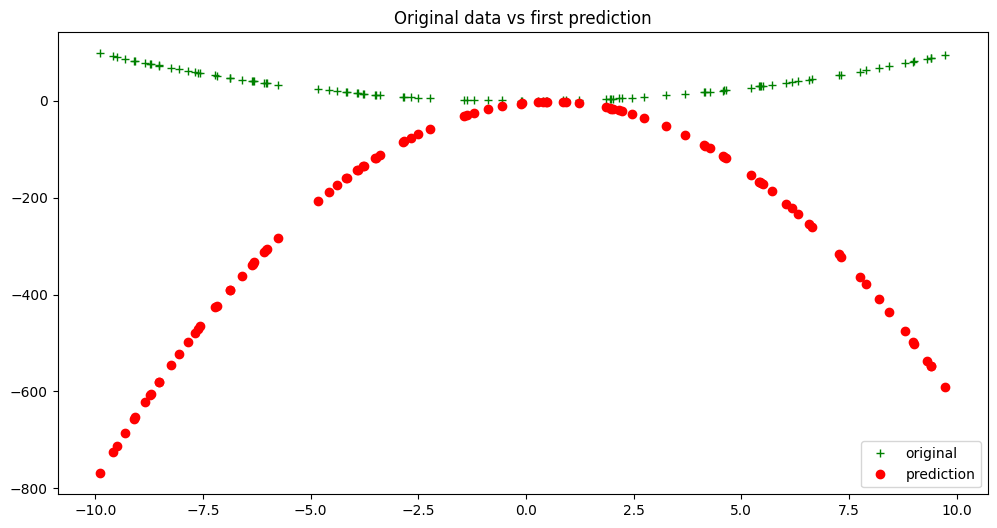

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


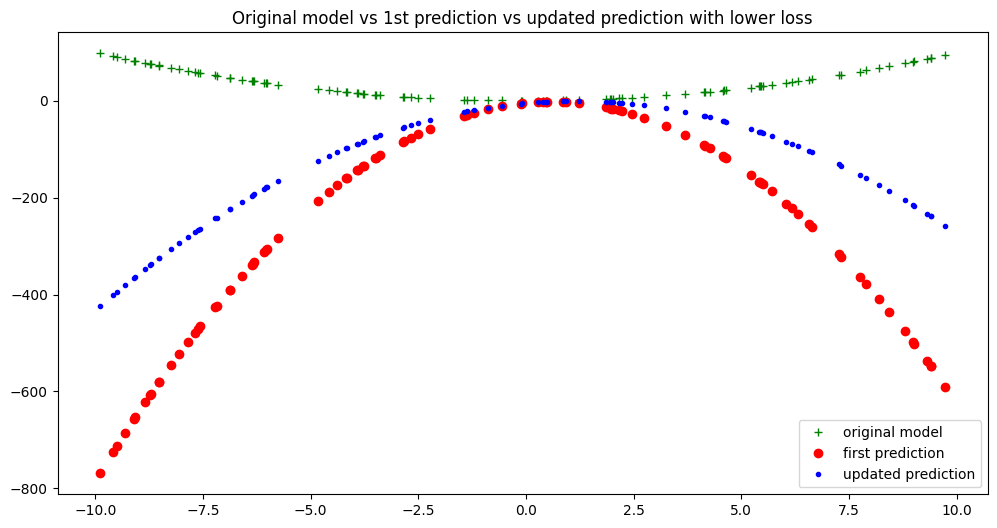

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [14]:
GD = gradient_descent(30000, 0.0003)

[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

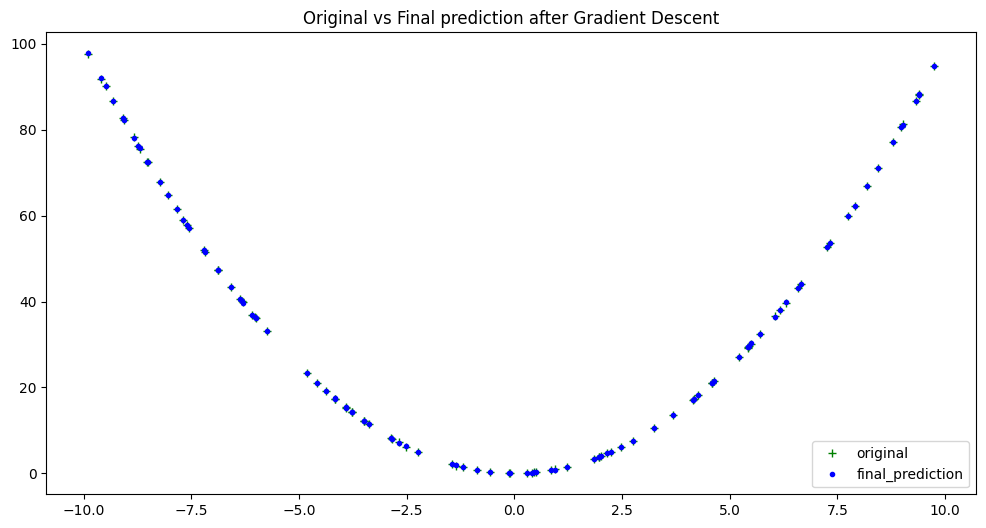

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


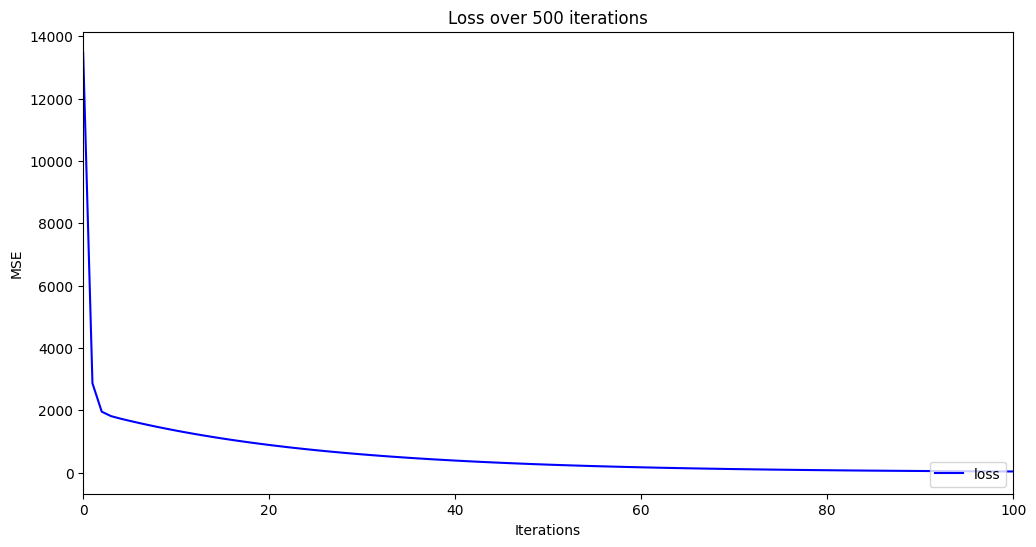

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

THINGS TO TRY


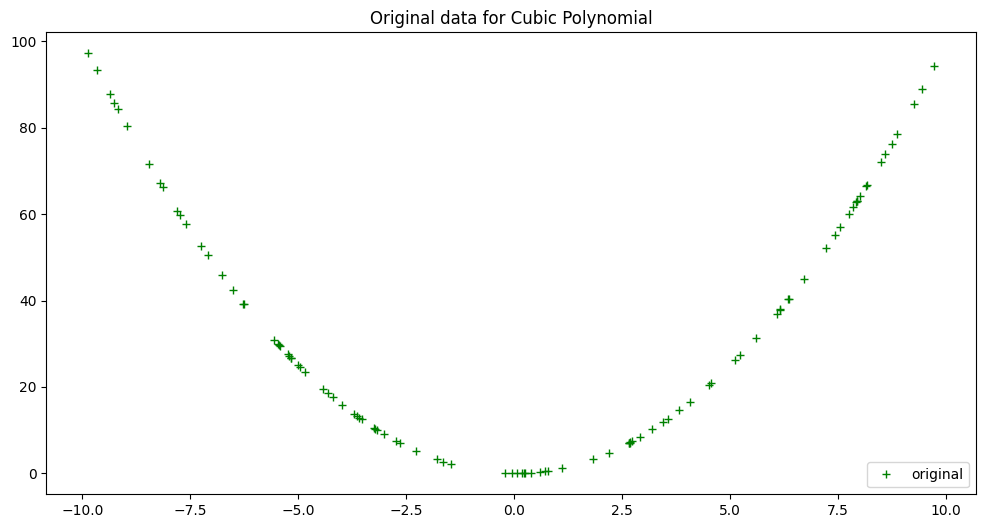

[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

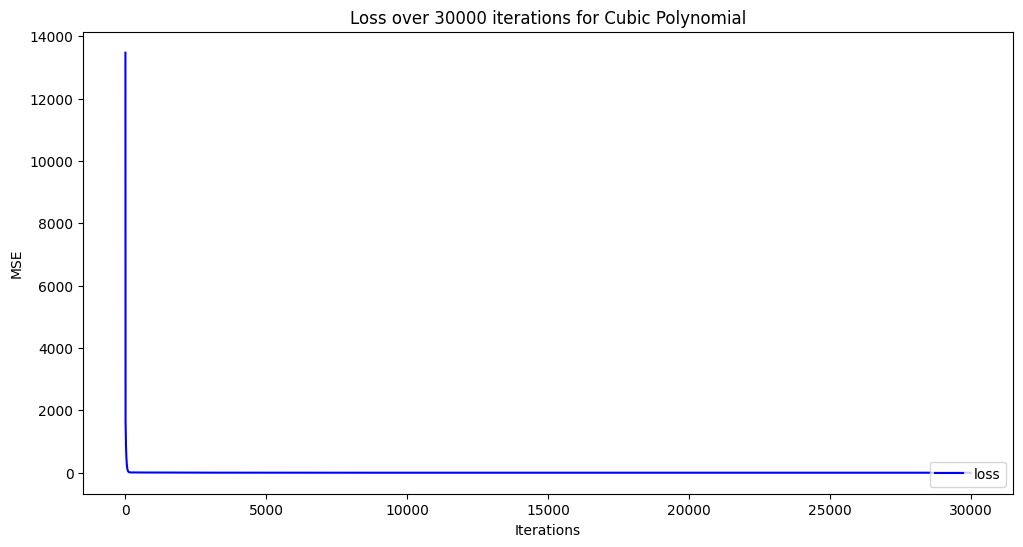

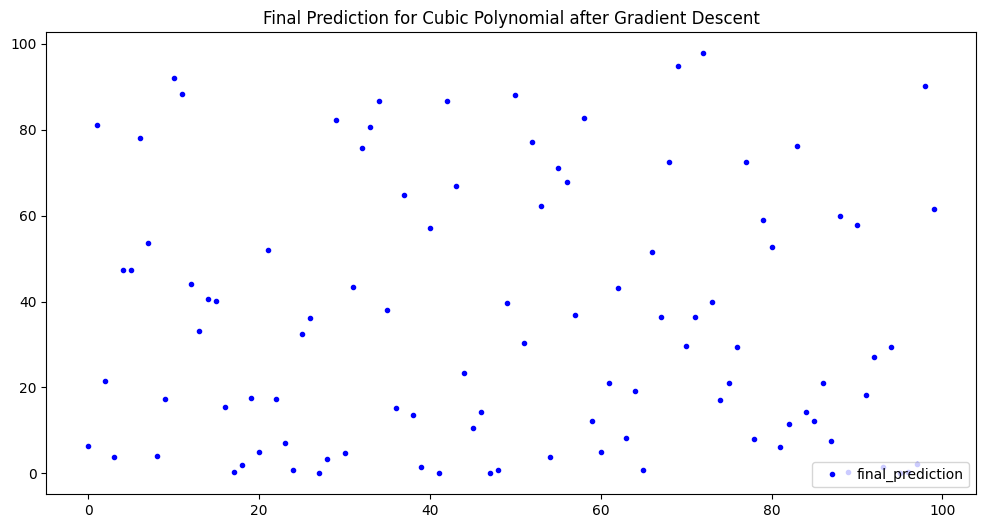

Final Coefficients predicted for Cubic Polynomial: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)


In [18]:
#Change the coefficients array and try a different polynomial instead of our  𝑥2
coeffs_cubic = [1, 0, 0, 0]  # Represents y = x^3

# Use the new coefficients for the cubic polynomial
hundred_xs_cubic = np.random.uniform(-10, 10, 100)
ys_cubic = [eval_2nd_degree(coeffs_cubic, x) for x in hundred_xs_cubic]

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(hundred_xs_cubic, ys_cubic, 'g+', label='original')
plt.title('Original data for Cubic Polynomial')
plt.legend(loc="lower right")
plt.show()

# Perform gradient descent for the cubic polynomial
GD_cubic = gradient_descent(30000, 0.0003)

# Visualize the loss over iterations for the cubic polynomial
plt.figure(figsize=(12, 6))
plt.plot(GD_cubic[3], 'b-', label='loss')
plt.title('Loss over 30000 iterations for Cubic Polynomial')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

# Visualize the final predictions for the cubic polynomial
plt.figure(figsize=(12, 6))
plt.plot(GD_cubic[2], 'b.', label='final_prediction')
plt.title('Final Prediction for Cubic Polynomial after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

# Print the final coefficients predicted for the cubic polynomial
print(f"Final Coefficients predicted for Cubic Polynomial: {GD_cubic[1]}")



Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

If the learning rate is too small, the model may take a long time to converge, while if it's too large, the optimization process may not converge, or it might oscillate and fail to find the optimal solution.

Experimenting with learning rate: 1e-05
[134713.89057256628, 123630.45878546423, 113473.10878375187, 104164.44143316484, 95633.52641419876, 87815.36157565704, 80650.37747400091, 74083.98332199229, 68066.15088574983, 62551.03315859018, 57496.61490510184, 52864.39241182355, 48619.08000351412, 44728.34108801779, 41162.541679689486, 37894.52452268083, 34899.4020924058, 32154.366897396878, 29638.517635631204, 27332.699880251846, 25219.36008035556, 23282.411764009394, 21507.112923665605, 19879.95364937975, 18388.55315334771, 17021.56540085999, 15768.59262837147, 14620.106089502622, 13567.373424880521, 12602.39210221688, 11717.828419288318, 10906.961604886723, 10163.632591664304, 9482.197070409158, 8857.482467920334, 8284.748520558589, 7759.6511429556, 7278.209316481006, 6836.774745083958, 6432.004047219308, 6060.83327189911, 5720.454544625277, 5408.2946651934635, 5121.995494236032, 4859.395979005899, 4618.515681397928, 4397.539682654771, 4194.804749697554, 4008.7866576380707, 3838.0885718419

<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-12-bad7532be911>:32: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-12-bad7532be911>:33: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-12-bad7532be911>:37: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


[1548813.4474793794, 16543429.687108263, 176885110.7957383, 1891440315.6665945, 20225389541.85867, 216272540786.81543, 2312628582416.4956, 24729218789103.82, 264432545176136.03, 2827609377647353.5, 3.0235971095194748e+16, 3.233169175688065e+17, 3.4572671357927276e+18, 3.696897811011931e+19, 3.953137807481302e+20, 4.227138353240141e+21, 4.52013047043726e+22, 4.833430506033562e+23, 5.168446045849621e+24, 5.526682238528724e+25, 5.9097485578274624e+26, 6.319366033615369e+27, 6.757374984070782e+28, 7.225743283811946e+29, 7.726575205110223e+30, 8.262120871906947e+31, 8.834786369108624e+32, 9.447144552579304e+33, 1.0101946608396985e+35, 1.0802134413307074e+36, 1.1550853751905674e+37, 1.2351468449934421e+38, 1.320757548718479e+39, 1.4123021157910189e+40, 1.510191835135173e+41, 1.6148665030014127e+42, 1.7267963988711373e+43, 1.8464843983154473e+44, 1.9744682323007257e+45, 2.1113229030916178e+46, 2.257663267605456e+47, 2.4141467998245668e+48, 2.581476544677388e+49, 2.7604042766594703e+50, 2.9517

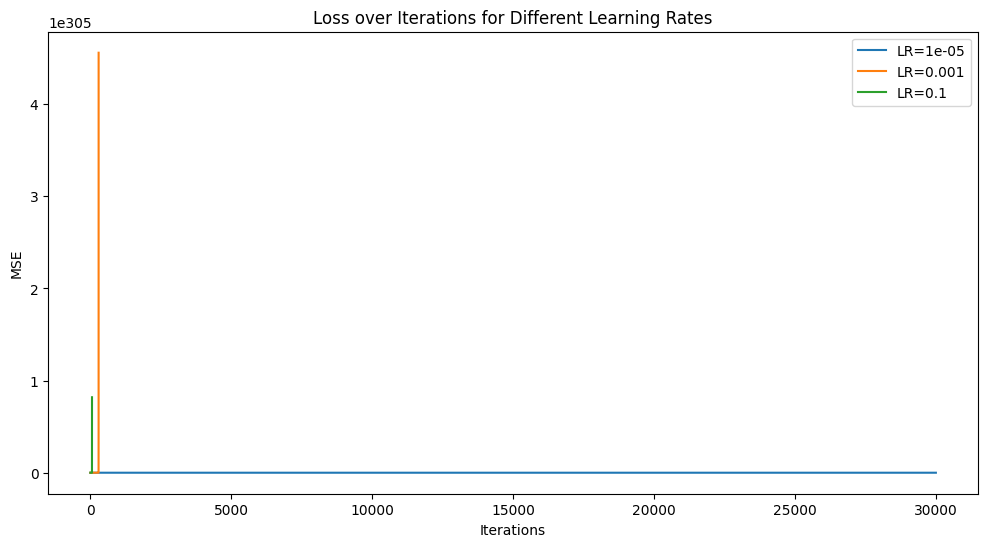

In [19]:
#2
# Define learning rates to experiment with
learning_rates = [0.00001, 0.001, 0.1]

# Initialize lists to store results for each learning rate
results = []

# Iterate over different learning rates
for lr in learning_rates:
    print(f"Experimenting with learning rate: {lr}")

    # Perform gradient descent
    GD_experiment = gradient_descent(30000, lr)

    # Store the results
    results.append((lr, GD_experiment))

# Plot the loss over iterations for each learning rate
plt.figure(figsize=(12, 6))

for lr, result in results:
    plt.plot(result[3], label=f'LR={lr}')

plt.title('Loss over Iterations for Different Learning Rates')
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()


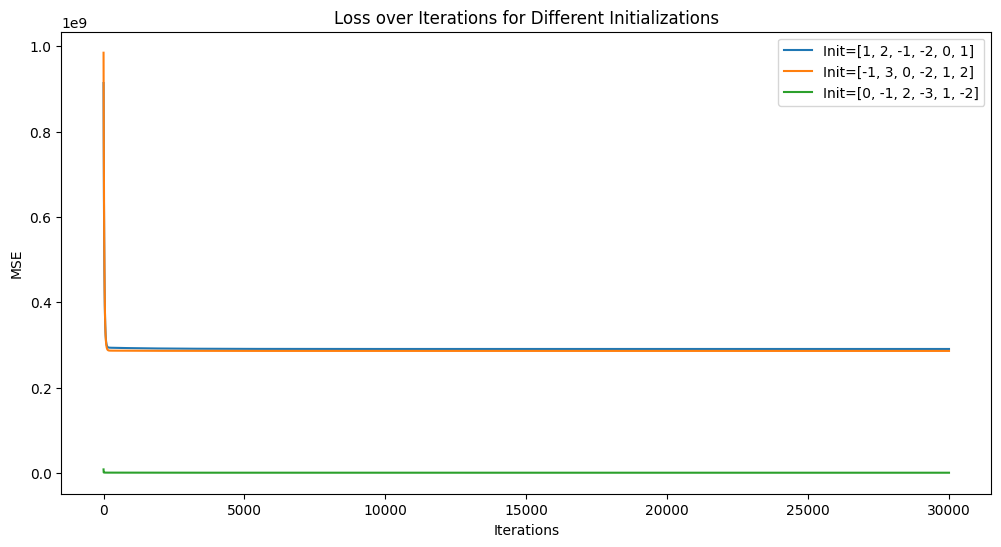

In [20]:
#Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  𝑥2 ?
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth-degree polynomial, given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth-degree polynomial.
    """
    a, b, c, d, e, f = coeffs
    y = a * (x**5) + b * (x**4) + c * (x**3) + d * (x**2) + e * x + f
    return y

def gradient_descent_5th_degree(epochs, lr, initial_coeffs):
    """
    Perform gradient descent for a fifth-degree polynomial.

    Args:
        epochs: Number of iterations to perform finding new coefficients and updating loss.
        lr: Specified learning rate.
        initial_coeffs: Initial coefficients for the fifth-degree polynomial.

    Returns:
        Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates).
    """
    losses = []
    coeffs_to_test = initial_coeffs
    xs = np.random.uniform(-10, 10, 100)
    ys = [eval_5th_degree(coeffs_to_test, x) for x in xs]

    for _ in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(coeffs_to_test, xs, ys, lr)
        coeffs_to_test = loss[1]
        losses.append(loss[0])

    return loss[0], loss[1], loss[2], losses

# Experiment with different initializations
initializations = [
    [1, 2, -1, -2, 0, 1],  # Example initialization 1
    [-1, 3, 0, -2, 1, 2],  # Example initialization 2
    [0, -1, 2, -3, 1, -2]  # Example initialization 3
]

results = []

for init_coeffs in initializations:
    GD_result = gradient_descent_5th_degree(30000, 0.0003, init_coeffs)
    results.append((init_coeffs, GD_result))

# Plot the loss over iterations for each initialization
plt.figure(figsize=(12, 6))

for init_coeffs, result in results:
    plt.plot(result[3], label=f'Init={init_coeffs}')

plt.title('Loss over Iterations for Different Initializations')
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()


In [21]:
#Can you modify the algorithm to find a maxima of a function, instead of a minima?


#to find a maximum instead of a minimum, WE can simply change the sign of the gradient updates.
# In gradient descent, the update rule is typically given by subtracting the gradient multiplied by the learning rate.
# To find a maximum,instead add the gradient multiplied by the learning rate.
def calc_gradient_2nd_poly_for_maxima(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a second degree polynomial to find a maximum.

    Args:
        coeffs: a, b, and c, for a 2nd degree polynomial [y = ax^2 + bx + c].
        inputs_x: x input datapoints.
        outputs_y: actual y output points.
        lr: learning rate.

    Returns:
        updated_model_loss: Updated MSE loss for the model.
        new_model_coeffs: Updated coefficients for the model.
        new_y_bar: Updated predicted y values.
    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        x_squared = x ** 2
        partial_a = -x_squared * (y - y_bar)  # Change the sign to find a maximum
        a_s.append(partial_a)
        partial_b = -x * (y - y_bar)  # Change the sign to find a maximum
        b_s.append(partial_b)
        partial_c = -(y - y_bar)  # Change the sign to find a maximum
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    a_new = coeffs[0] + lr * gradient_a  # Change the sign to add the gradient
    b_new = coeffs[1] + lr * gradient_b  # Change the sign to add the gradient
    c_new = coeffs[2] + lr * gradient_c  # Change the sign to add the gradient

    new_model_coeffs = (a_new, b_new, c_new)

    # Update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar
